In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from aci.utils.io import load_yaml 
from aci.plot import load_files, selector
import os
import pickle
import pandas as pd

run_folder = '../runs/repro'
config =  load_yaml(f'{run_folder}/plot.yml')
sns.set_style("whitegrid")

architecture_order = ['personal', 'shared', 'global', 'random']

## Loading preprocessed files

### Metrics
File containing the average coordination and prediction of both agent types.

### Pattern metrics
File containing the entropy and JS divergence. 

In [21]:
try:
    dfs = pickle.load(open("temp.pickle", "rb"))
except:
    input_files = os.listdir(os.path.join(run_folder, 'merge'))
    input_files = [os.path.join(run_folder, 'merge', f) for f in input_files]

    dfs = load_files(input_files, config['preprocess_args'])
    pickle.dump(dfs, open("dfs.pickle", "wb"))

## Plotting coordination and prediciton metrics

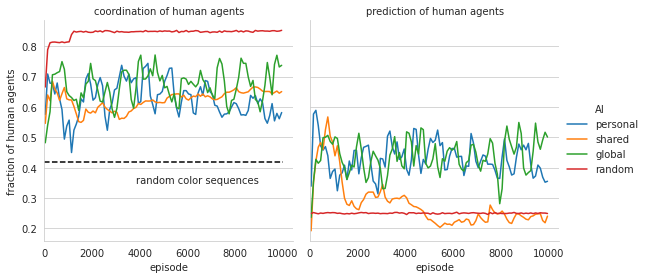

In [24]:
df = dfs['metrics'].copy()
w = (
    (df['lr'] == 0.0001)
)

sns.set_style("whitegrid")
fg = sns.relplot(data=df[w], x='episode_bin', y='value', hue='AI', col='metric', kind='line', hue_order=architecture_order, height=4)
fg.set(xlim=(0, None))
fg.set_axis_labels('episode', 'fraction of human agents')
fg.set_titles(col_template = '{col_name} of human agents')
for ax in fg.axes:
    for aax in ax:
        aax.grid(axis='x')

fg.axes[0,0].hlines(0.42, xmin=0, xmax=10000, linestyles='dashed')
fg.axes[0,0].text(9000, 0.35, 'random color sequences', ha='right')


fg.savefig('plots/metrics.png', dpi=300)
fg.savefig('plots/metrics.pdf', dpi=300)

## Complexity and diversity

We plot sequence entropy and Jensen-Shannon divergence as measure of complexity
and diversity.

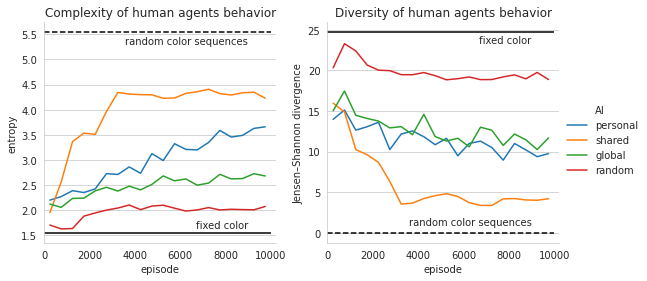

In [28]:
w = selector(dfs['pattern_metrics'], config['plots'][2]['selectors'])

dfe = dfs['pattern_metrics'][w].copy()

w = (
    (dfe['lr'] == 0.0001) & 
    (dfe['metric_name'].isin(['entropy', 'js_div_agents'])) & 
    (dfe['agent'] != 'all')
)
dfe['metric_name'] = dfe['metric_name'].astype('str')

sns.set_style("whitegrid")
fg = sns.relplot(data=dfe[w], x='episode_bin', y='value', hue='AI', col='metric_name', kind='line', hue_order=architecture_order, height=4, facet_kws={'sharey': False, 'sharex': True}, ci=None)
fg.set(xlim=(0, None))
fg.set_axis_labels('episode')
fg.axes[0,0].set_ylabel('entropy')
fg.axes[0,1].set_ylabel('Jensen–Shannon divergence')
fg.axes[0,0].set_title('Complexity of human agents behavior')
fg.axes[0,1].set_title('Diversity of human agents behavior')
fg.axes[0,0].hlines(5.54, xmin=0, xmax=10000, linestyles='dashed')
fg.axes[0,0].text(9000, 5.3, 'random color sequences', ha='right')
fg.axes[0,0].hlines(1.55, xmin=0, xmax=10000)
fg.axes[0,0].text(9000, 1.65, 'fixed color', ha='right')


fg.axes[0,1].hlines(0.0, xmin=0, xmax=10000, linestyles='dashed')
fg.axes[0,1].text(9000, 1, 'random color sequences', ha='right')


fg.axes[0,1].hlines(24.68, xmin=0, xmax=10000)
fg.axes[0,1].text(9000, 23.3, 'fixed color', ha='right')


for ax in fg.axes:
    for aax in ax:
        aax.grid(axis='x')

fg.savefig('plots/entropy.png', dpi=300)
fg.savefig('plots/entropy.pdf', dpi=300)

## Adaptation

We plot Jensen-Shannon divergence accross episodes as a measure of adaptation
accross episodes.

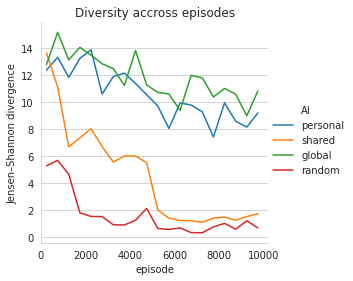

In [29]:
w = selector(dfs['pattern_metrics'], config['plots'][2]['selectors'])

dfe = dfs['pattern_metrics'][w].copy()

w = (
    (dfe['lr'] == 0.0001) & 
    (dfe['metric_name'].isin(['js_div_episodes'])) & 
    (dfe['agent'] != 'all')
)
dfe['metric_name'] = dfe['metric_name'].astype('str')

sns.set_style("whitegrid")
fg = sns.relplot(data=dfe[w], x='episode_bin', y='value', hue='AI', col='metric_name', kind='line', hue_order=architecture_order, height=4, facet_kws={'sharey': False, 'sharex': True}, ci=None)
fg.set(xlim=(0, None))
fg.set_axis_labels('episode')
fg.axes[0,0].set_ylabel('Jensen–Shannon divergence')
fg.axes[0,0].set_title('Diversity accross episodes')

for ax in fg.axes:
    for aax in ax:
        aax.grid(axis='x')

fg.savefig('plots/entropy2.png', dpi=300)
fg.savefig('plots/entropy2.pdf', dpi=300)

## Dependency of results based on learning rate

We plot entropy and JS divergence for two different learning rates.

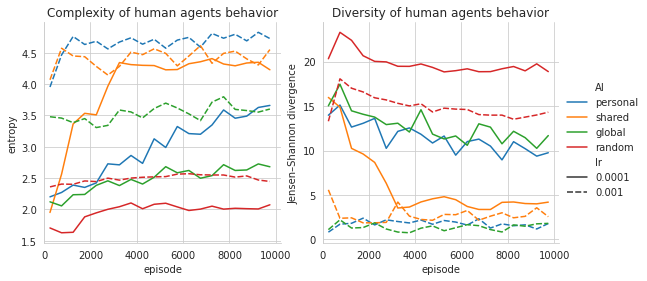

In [30]:
w = selector(dfs['pattern_metrics'], config['plots'][2]['selectors'])

dfe = dfs['pattern_metrics'][w].copy()

w = (
    # (dfe['lr'] == 0.001) & 
    (dfe['metric_name'].isin(['entropy', 'js_div_agents'])) & 
    (dfe['agent'] != 'all')
)
dfe['metric_name'] = dfe['metric_name'].astype('str')

sns.set_style("whitegrid")
fg = sns.relplot(data=dfe[w], x='episode_bin', y='value', hue='AI', style='lr', col='metric_name', kind='line', hue_order=architecture_order, height=4, facet_kws={'sharey': False, 'sharex': True}, ci=None)
fg.set(xlim=(0, None))
fg.set_axis_labels('episode')
fg.axes[0,0].set_ylabel('entropy')
fg.axes[0,1].set_ylabel('Jensen–Shannon divergence')
fg.axes[0,0].set_title('Complexity of human agents behavior')
fg.axes[0,1].set_title('Diversity of human agents behavior')

fg.savefig('plots/entropy_lr.png', dpi=300)

## Sequence distributions

We plot the distributions of sequences.

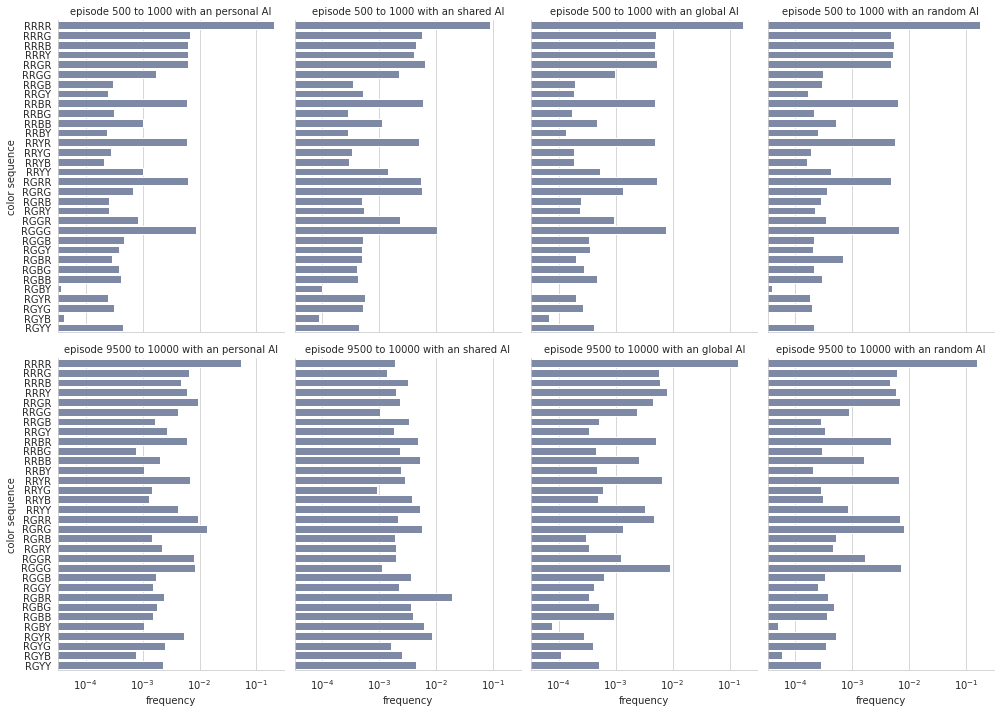

In [36]:
df = dfs['top_pattern'].copy()
w = (
    (df['lr'] == 0.0001) &
    df['episode_bin'].isin([750, 9750]) &
    (df['pattern_length'] == 4) &
    (df['agent_type'] == 'ci') &
    (df['type'] == 'pattern') &
    (df['episode_part'] == 'full') &
    (df['agent'] != 'all') &
    df['name'].str.slice(0,2).isin(['AA','AB'])
)

df = df[w]

e_map = {
    750: '500 to 1000',
    9750: '9500 to 10000'
}

df['episodes'] = df['episode_bin'].map(e_map)

df['AI'] = df['architecture'].map({
    'individual': 'personal',
    'central': 'global',
    'shared': 'shared',
    'random': 'random'
})


df['pattern'] = df['name'].astype(str)
df = df.sort_values('pattern')
df['pattern'] = df['pattern'].str.replace('A','R')
df['pattern'] = df['pattern'].str.replace('B','G')
df['pattern'] = df['pattern'].str.replace('C','B')
df['pattern'] = df['pattern'].str.replace('D','Y')


g = sns.catplot(
    data=df, y='pattern', x='freq', col='AI', row='episodes', ci=None,
    kind='bar', height=5, aspect=0.7, col_order=architecture_order, row_order=e_map.values(), 
    log=True, color='#7887AB'
)


g.set_titles(template = 'episode {row_name} with an {col_name} AI')

g.set_axis_labels('frequency', 'color sequence')
g.savefig('plots/pattern.png', dpi=300)